<a href="https://colab.research.google.com/github/priratec/Neural-Network-Project/blob/main/Healthcare_Diabetes_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Classification Model:

## Goal:
Build a classification model to predict whether a person has diabetes based on their health metrics.

### Steps:


1. Preprocess the data (handle missing values, normalize features).

2. Split the data into training and testing sets.

3. Train a classifier (e.g., Logistic Regression, Decision Tree, Random Forest, KNN).

4. Evaluate the model's performance using metrics like accuracy, precision, recall, and F1 score.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
#load data
df = pd.read_csv('/content/drive/MyDrive/Healthcare Diabetes.csv')

In [ ]:
# Data EDA Function
print("First 5 Rows of the DataFrame:")
print(df.head(5))
print("\nLast 5 Rows of the DataFrame:")
print(df.tail(5))
print("\nShape of the DataFrame:")
print(df.shape)



First 5 Rows of the DataFrame:
   Id  Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age  Outcome
0   1            6      148             72  ...  33.6                     0.627   50        1
1   2            1       85             66  ...  26.6                     0.351   31        0
2   3            8      183             64  ...  23.3                     0.672   32        1
3   4            1       89             66  ...  28.1                     0.167   21        0
4   5            0      137             40  ...  43.1                     2.288   33        1

[5 rows x 10 columns]

Last 5 Rows of the DataFrame:
        Id  Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age  Outcome
2763  2764            2       75             64  ...  29.7                     0.370   33        0
2764  2765            8      179             72  ...  32.7                     0.719   36        1
2765  2766            6       85             78  ...  

In [ ]:
print(df.columns)

if 'Id' in df.columns:
    df = df.drop(columns=['Id'])
else:
  print("No 'ID' column found in the DataFrame.")

print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
No 'ID' column found in the DataFrame.
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


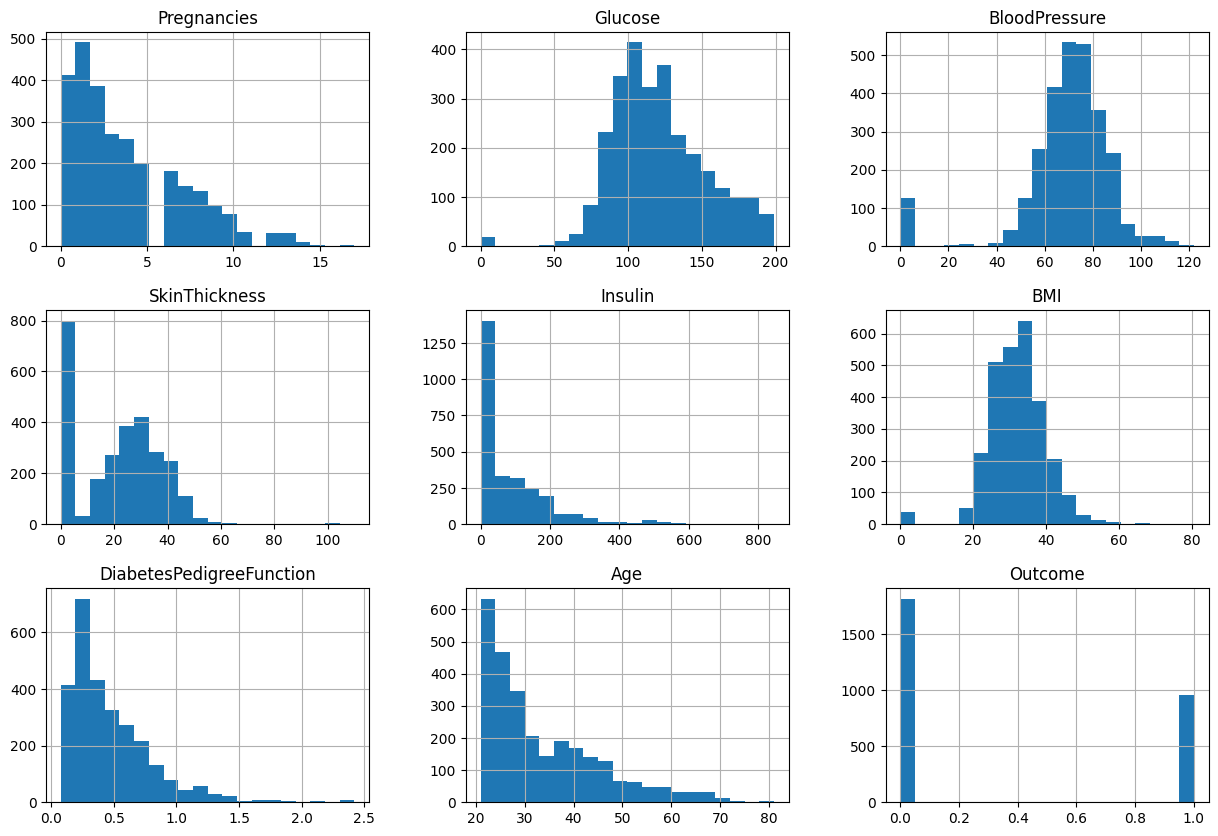

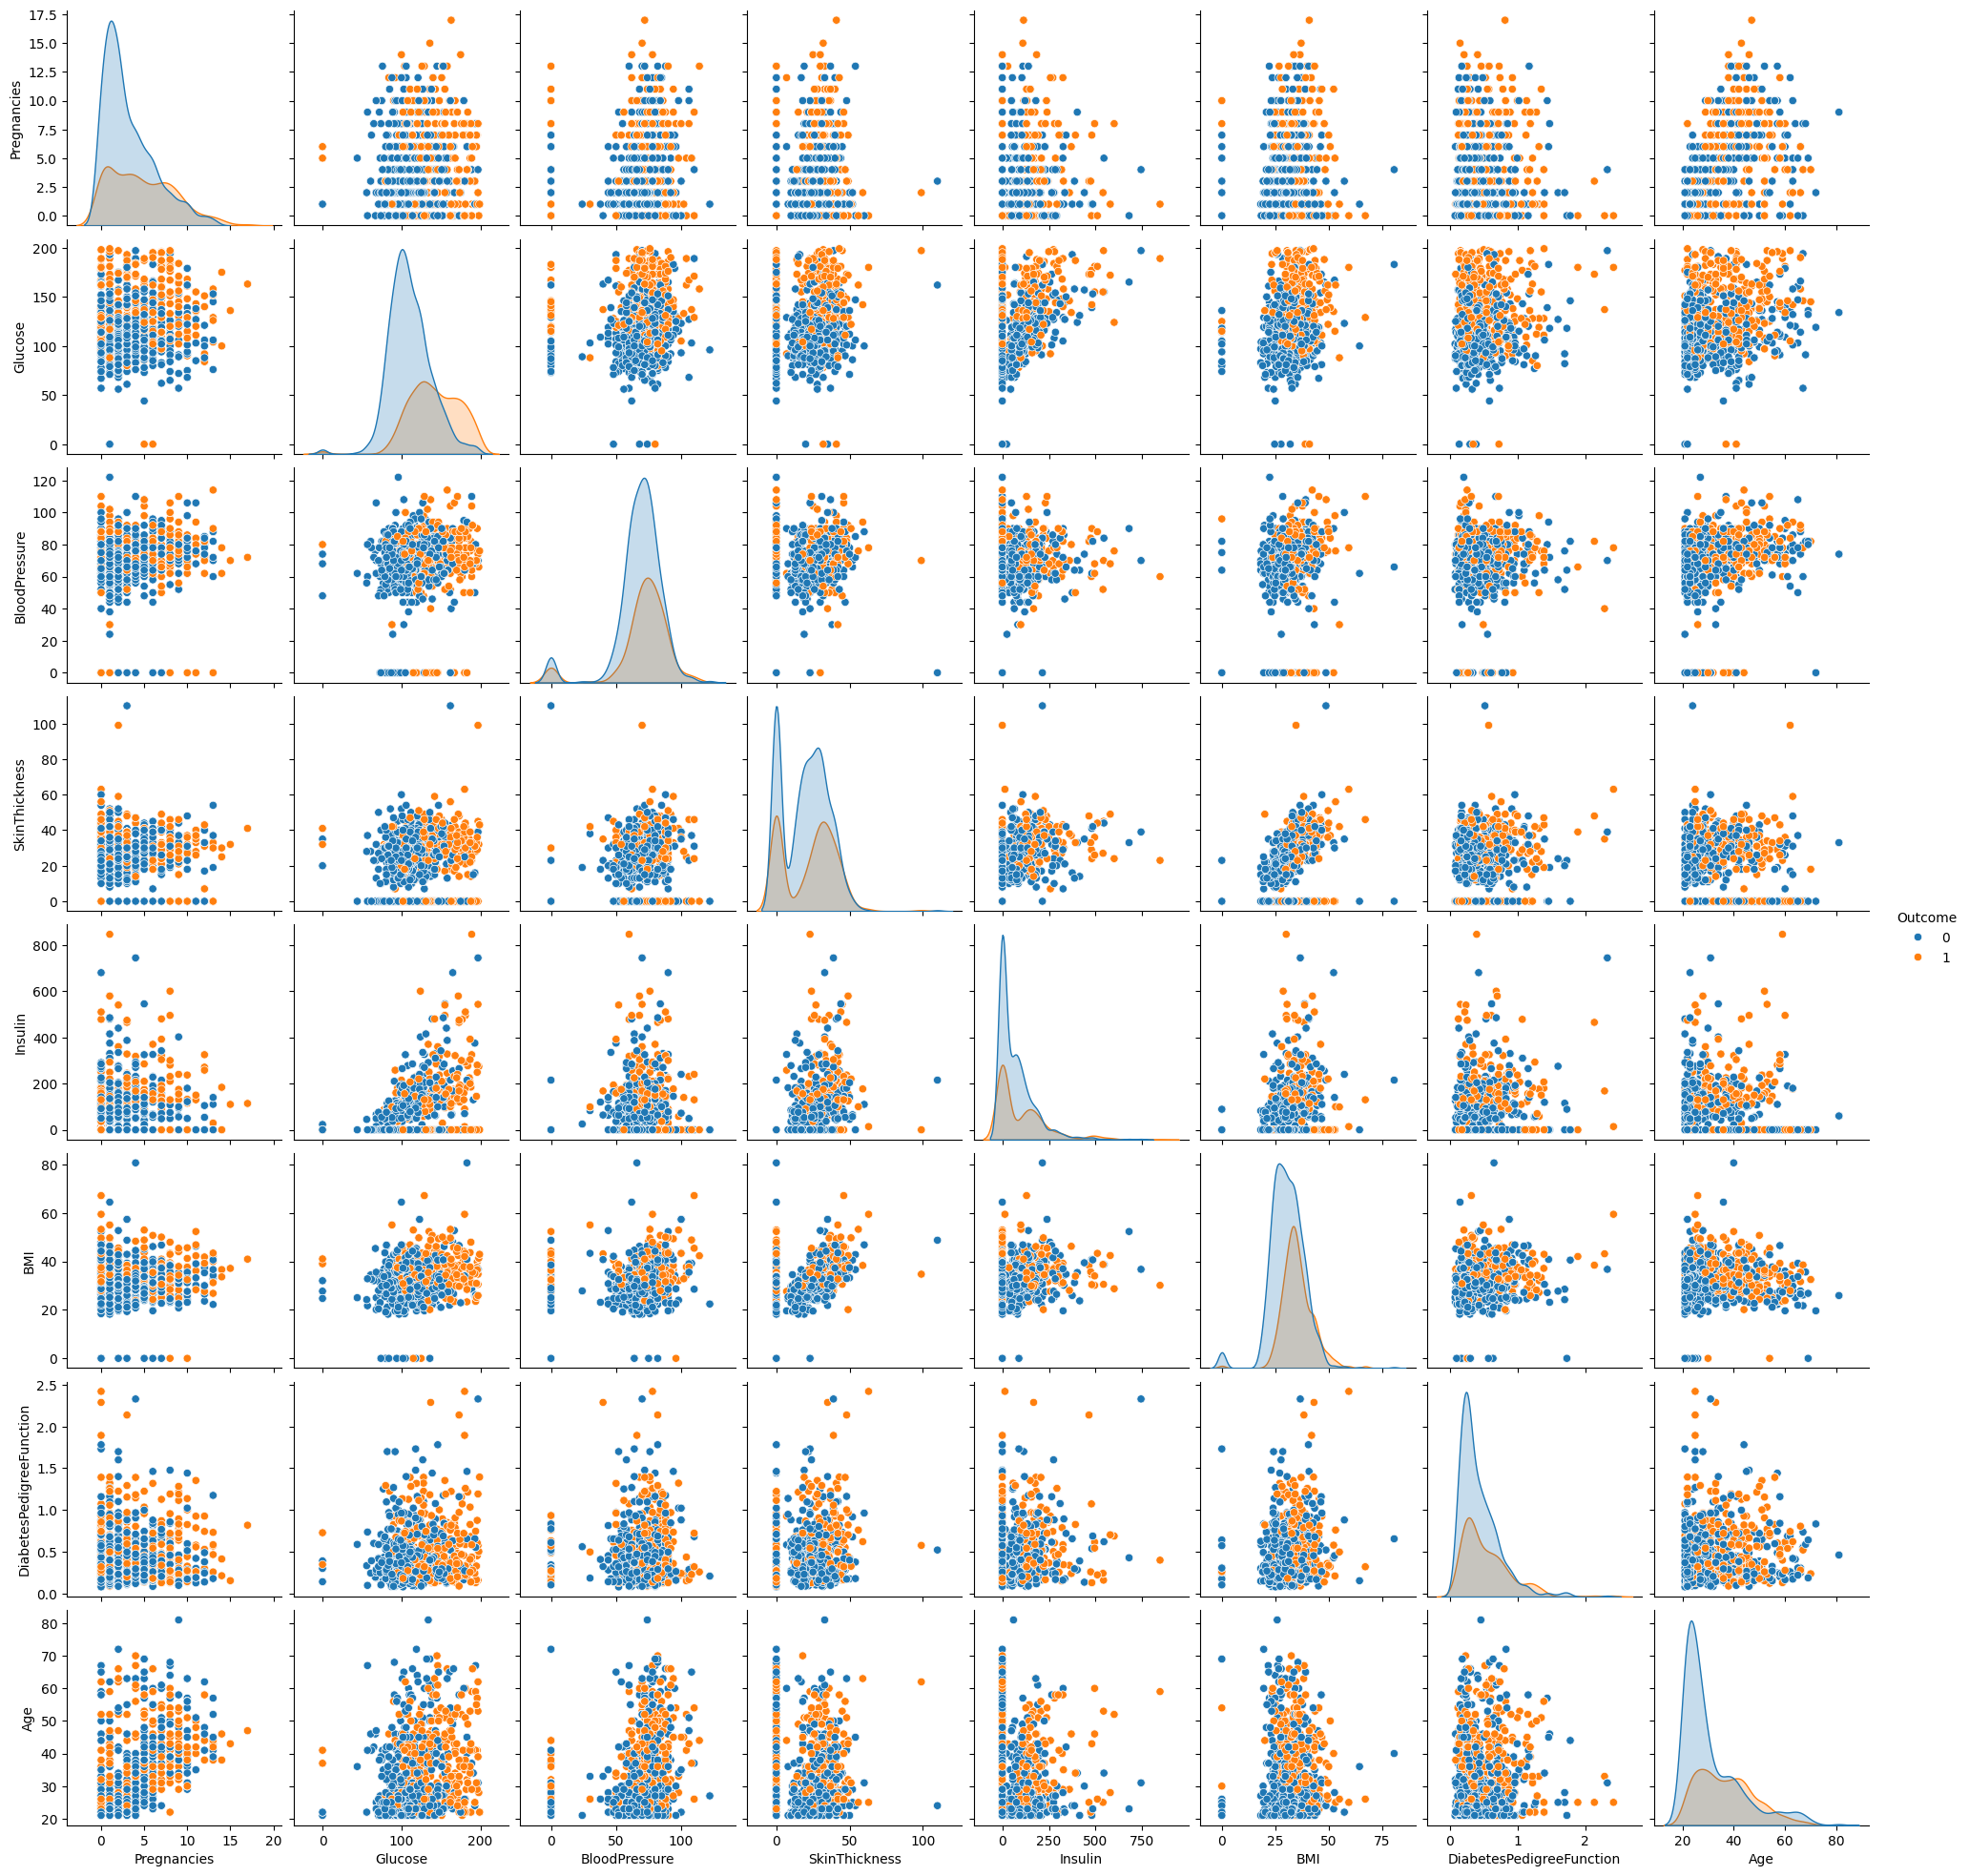

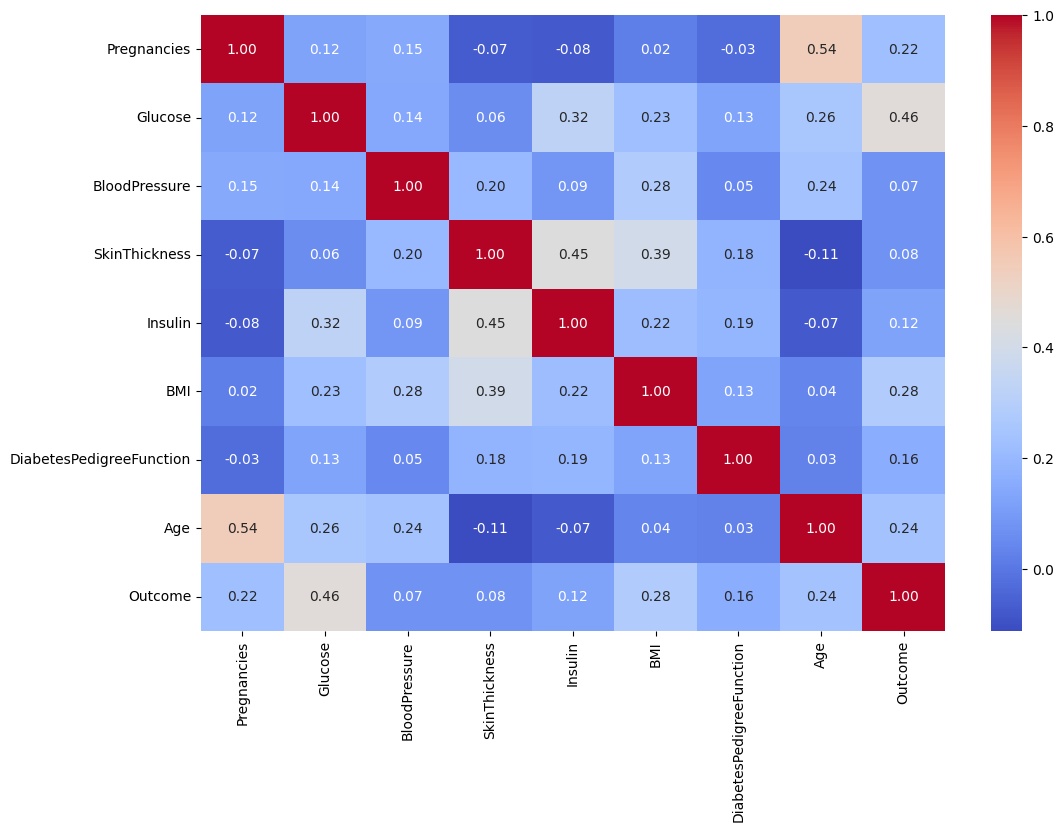

In [ ]:
# Visualize the distribution of each feature
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Pairplot to see relationships between features and target
sns.pairplot(df, hue='Outcome')  # Assuming 'Outcome' is your target variable
plt.show()

# Correlation heatmap to see correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


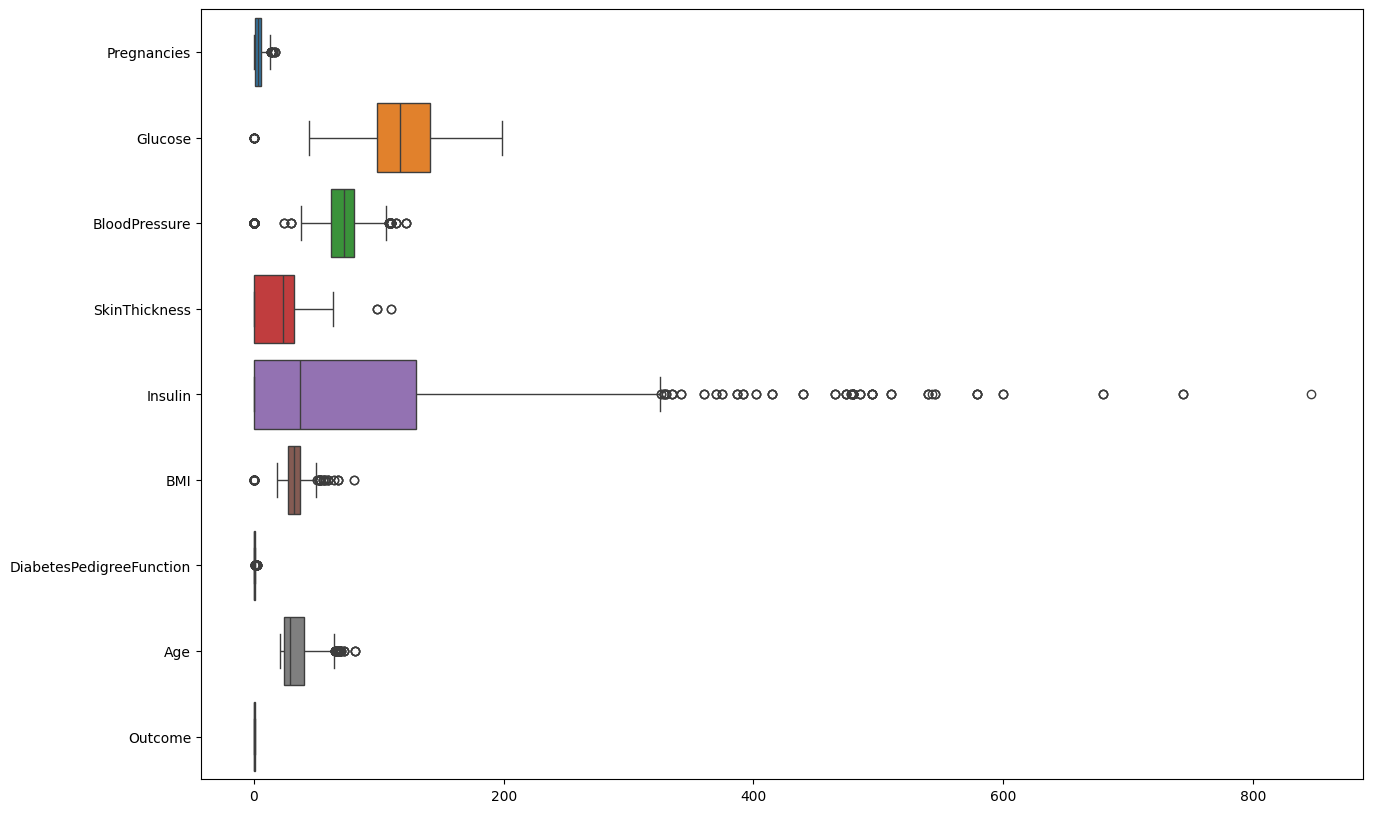

In [ ]:
# Boxplot for each feature to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')
plt.show()


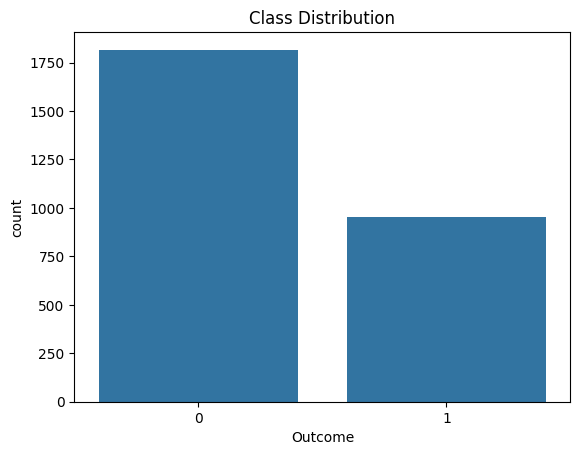

In [ ]:
# Bar plot to show class distribution
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.show()


Building deep neural network model

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['Outcome'])  # Features are all columns except 'Outcome'
y = df['Outcome']                 # Target variable is the 'Outcome' column


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the neural network architecture using an Input layer
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Define the optimizer with a specific learning rate
learning_rate = 4.6875e-04
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the custom optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
# Define callbacks for early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Fit the model to the training data with early stopping and learning rate scheduler
history = model.fit(X_train, y_train, epochs=295, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, lr_scheduler])


Epoch 1/295
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - binary_accuracy: 0.6868 - loss: 0.6494 - val_binary_accuracy: 0.7690 - val_loss: 0.6156 - learning_rate: 4.6875e-04
Epoch 2/295
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.7741 - loss: 0.5116 - val_binary_accuracy: 0.7563 - val_loss: 0.5615 - learning_rate: 4.6875e-04
Epoch 3/295
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.7913 - loss: 0.4705 - val_binary_accuracy: 0.8032 - val_loss: 0.5112 - learning_rate: 4.6875e-04
Epoch 4/295
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.8040 - loss: 0.4471 - val_binary_accuracy: 0.8159 - val_loss: 0.4735 - learning_rate: 4.6875e-04
Epoch 5/295
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.8177 - loss: 0.3980 - val_binary_accuracy: 0.8375 - val_loss: 0.4231 - learning_rate: 4.6875e-04
Epoch 6/295
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.8229 - loss: 0.4130 - val_binary_accuracy: 0.8321 - val_loss: 0.3719 - learning_r

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9804 - loss: 0.1148 
Test Accuracy: 97.83%


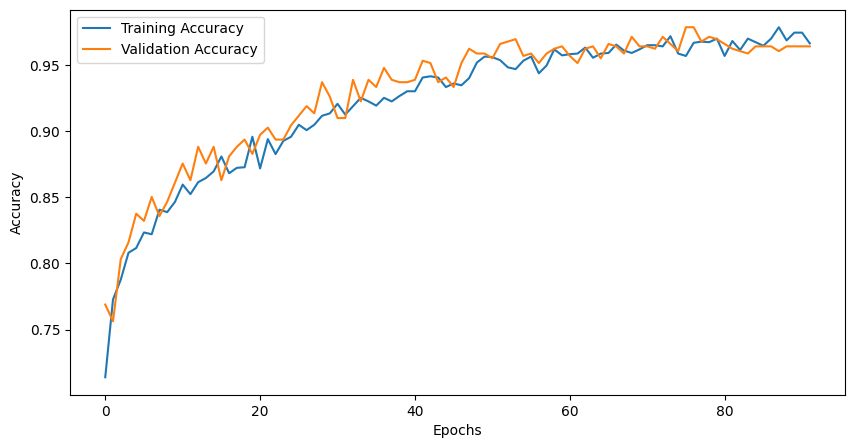

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2%}')

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Make predictions on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate performance using other metrics
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       367
           1       0.98      0.95      0.97       187

    accuracy                           0.98       554
   macro avg       0.98      0.97      0.98       554
weighted avg       0.98      0.98      0.98       554

Confusion Matrix:
 [[364   3]
 [  9 178]]
